In [68]:
#Importamos las librerias necesarias para el analisis numerico y la generacion de graficas
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from scipy.constants import pi, g

Datos a partir del que se resolvera el problema:

In [33]:
#Radio de la esfera (m) que se sumerge en el liquido
rad_esf=0.0255
#Volumen de la esfera (m3)
vol_esf=4/3*pi*np.power(rad_esf, 3)
#Densidad de la esfera (kg/m3)
dens_esf=3.25*1000
#Masa de la esfera (kg), dens=m/v
masa_esf=dens_esf*vol_esf
#Densidad del liquido (kg/m3), para este caso la glicerina
dens_glic=1.26*1000
#Viscosidad de la glicerina (Pa/s)
visc=1.40
#Diferencia entre los puntos del eje del tiempo h
h=0.00001
#Valor teorico de la velocidad terminal
val_teor=2/9*rad_esf*rad_esf*g*(dens_esf-dens_glic)/visc

Resolvemos la ecuacion diferencial

In [34]:
#La ecuacion brindada por el problema nos da la variacion de la velocidad respecto al tiempo:
# v'=g(1-(Dens_liq/Dens_esf))-v*(6pi*Radio_e*visc)/m
# Se usara el metodo de las diferencias finitas, el punto inicial sera t=0, y el h sera 0.00001
# Se sabe que aproximadamente f'(t)=(f(t+h)-f(t))/h
# Por lo que se obtiene: f(t+h)=f(t)+h*f'(t)
# Se crea una funcion que retorne la derivada de la velocidad segun una velocidad v
def derivada_v(v):
    return g*(1-dens_glic/dens_esf)-v*6*pi*rad_esf*visc/masa_esf
    
# La logica sera la siguiente: Crearemos un array con todos los tiempos del 0.00000, 0.00001, ..., 8.00000
# Se sabe que la velocidad inicial es 0, por lo tanto en un array de velocidades, el primer elemento seria 0
# Luego a partir de esa velocidad en el array se obtendra la siguiente velocidad, luego se buscara el ultimo
# termino de este array para calcular la siguiente velocidad y asi hasta completar todas las velocidades para los tiempos

# Para lograr esto, se define la funcion que a partir de la velocidad anterior, se puede calcular la nueva velocidad
def obtener_velocidad(v_anterior):
    nueva_velocidad = v_anterior + h * derivada_v(v_anterior)
    return nueva_velocidad

# Se crea el array de tiempos, se consideraran tiempos separados por 0.00001, se usaran funciones especiales 
# de numpy como np.linspace
inicio = 0.00000
final = 8.00000
paso = h
num_elementos = int((final - inicio) / paso) + 1

array_tiempos = np.linspace(inicio, final, num_elementos)
array_tiempos = np.round(array_tiempos, decimals=5)
# Se crea el array de velocidades, inicializando su primer elemento en 0 y luego obtener los siguientes valores
array_velocidades = np.zeros(num_elementos)
array_velocidades[0] = 0.0


for i in range(1, num_elementos):
    array_velocidades[i] = obtener_velocidad(array_velocidades[i - 1])


Ahora generamos el grafico

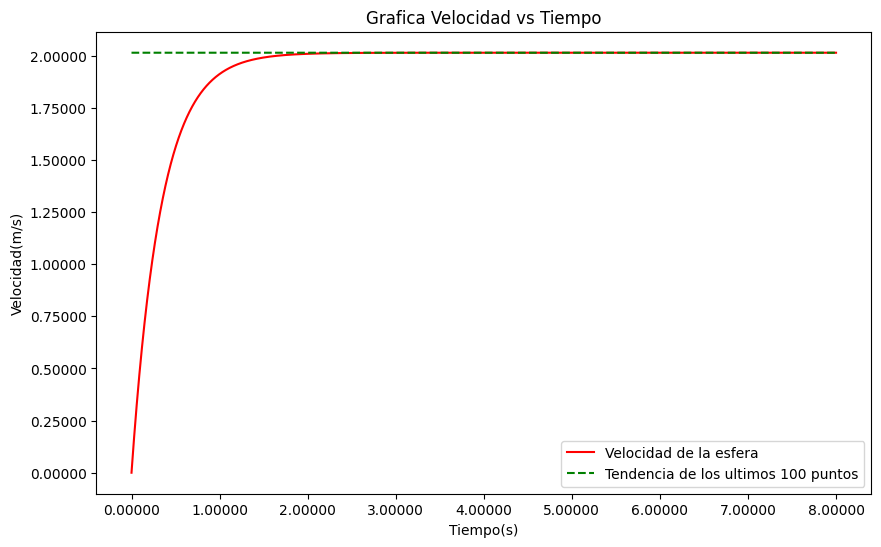

Valor teorico:  2.0142508862499997
Ultima velocidad:  2.0142508861613764
Pendiente de la recta:  0.00000000026642141801
Desviacion estandar de los ultimos 100 puntos:  0.00000000000007691594


In [72]:
# Se crean los datos en los ejes a partir de los calculos
x = array_tiempos
y = array_velocidades

# La grafica tiene un comportamiento particular, para confirmarlo, crearemos una nueva recta que relacione
# los ultimos 100 elementos de las velocidades

# Al probar, aparece una recta con una pendiente que tiende al 0+, asi que los valores aumentan a un ritmo bastante lento.
# Por lo tanto, el valor que sera elegido como resultado experimental de la simulacion o la tendencia de la grafica, 
# sera el ultimo elemento de la velocidad. Mientras mas a la derecha se elija un valor, 
# este sera ligeramente mayor y tambien mas preciso

# Ajustar una línea recta (polinomio de grado 1) a los últimos 100 puntos
degree = 1
coeffs = np.polyfit(x[-100:], y[-100:], degree)
polynomial = np.poly1d(coeffs)

# Para entender mejor la tendencia, obtendremos la pendiente de esta recta, si es muy cercano a 0, es decir, 
# hay una recta horizontal. Entonces la grafica tiende a cierto limite. Ademas, para complementar, 
# se mostrara la desviacion estandar de los ultimos 100 valores

# Crear puntos para la línea ajustada
x_fit = x
y_fit = polynomial(x_fit)
m=coeffs[0]
desv_std=np.std(y_fit[-100:])

# Como se menciono anteriormente,se eligira el ultimo valor de la velocidad para obtener la tendencia
y_tend = y[-1]


plt.figure(figsize=(10, 6))
# Graficar los puntos de la relacion entre x, y
plt.plot(x, y, color='red', label='Velocidad de la esfera en glicerina')
# Configurar el formato para 5 decimales en el eje x
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.5f'))

# Configurar el formato para 5 decimales en el eje y
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.5f'))

plt.plot(x_fit, y_fit, '--', color='green', label='Tendencia de los ultimos 100 puntos')
plt.xlabel('Tiempo(s)')
plt.ylabel('Velocidad(m/s)')
plt.title('Grafica Velocidad vs Tiempo')
plt.legend()
plt.show()
m="{:.20f}".format(m)
desv_std="{:.20f}".format(desv_std)
print("Valor teorico: ",val_teor)
print("Ultima velocidad: ", y_tend)
print("Pendiente de la recta: ", m)
print("Desviacion estandar de los ultimos 100 puntos: ", desv_std)